# Homework 1: Working with multiple data sources and studying purchase behaviour

Homework 1 goals:
* Practice joining data from multiple sources
* Accessing data through an API
* Manipulating data in pandas
* Creating analytic reports in pandas


We've added names and addresses for the customers included in the instacart data, this data is hosted on a public API.  

Information:

API : https://jdw6paifodaa6hb7alta76h4te0erogq.lambda-url.us-west-2.on.aws/

How to use:

To get the record for a particular Customer ID, add the ID to the url, for example customer id 7 is
 
https://jdw6paifodaa6hb7alta76h4te0erogq.lambda-url.us-west-2.on.aws/7

To bulk access the customer id data add query parameters for startid and size: https://jdw6paifodaa6hb7alta76h4te0erogq.lambda-url.us-west-2.on.aws/bulk?startid=23&size=500

You can download a parquet file of the full instacart data in colab with:
```python
!wget https://msai-339-public.s3.amazonaws.com/instacart-export/sampled-parquet000.parquet
df = pd.read_parquet("sampled-parquet000.parquet")
```
**NOTE:** The HW should be done in pandas.  After completing the work in colab.  Download and save your .ipynb file and submit your completed .ipynb file in canvas.

**SCHEMA INFORMATION OF API DATA**


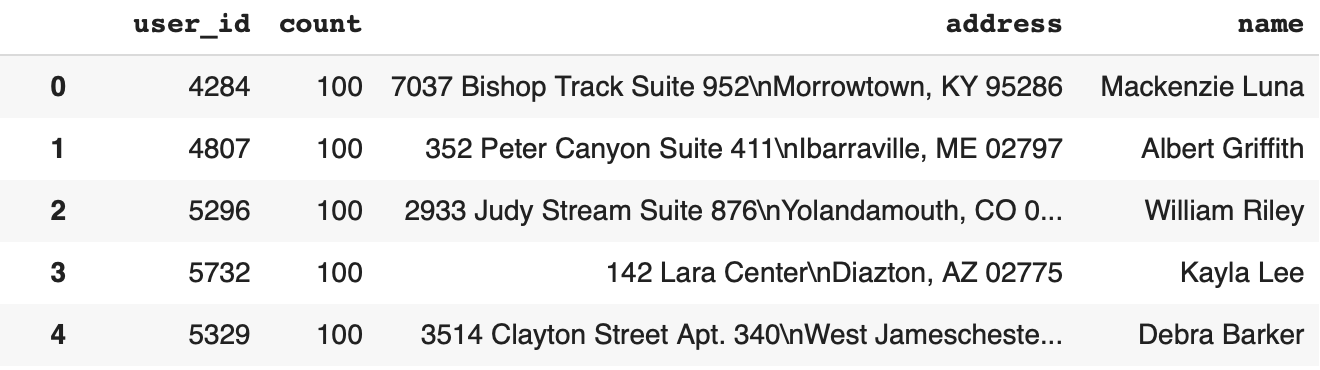

In [ ]:
#@title Standard imports for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
#add or use other visualization libraries as you prefer

from datetime import datetime, timedelta
from dateutil.parser import parse
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
import requests
all_user_info = []
i = 0
while i < 600000:
  print(i)
  request = requests.get("https://jdw6paifodaa6hb7alta76h4te0erogq.lambda-url.us-west-2.on.aws/bulk?startid={}&size=1000".format(i))
  request_json = request.json()
  all_user_info += request_json
  i += 1000

In [ ]:
user_info = pd.DataFrame(all_user_info)
user_info.head()

,user_id,name,address
0,1,Michelle Pugh,"6458 Brandi Lane Apt. 167\nNorth David, DC 82511"
1,2,Kyle Haas,"43203 Turner Spring\nNew Anthony, NH 45415"
2,3,Theresa Howard,"4247 Lisa Mountains Apt. 447\nRobinsonberg, SD..."
3,4,Wayne Scott,"7042 Taylor Causeway\nHoffmantown, MA 40593"
4,5,Justin Compton,"1709 Amber Passage\nRothmouth, NJ 12022"


In [ ]:
len(user_info)

206209

## **To do:**
Download data and access API to store locally as needed to answer the following questions 

In [ ]:
!wget https://msai-339-public.s3.amazonaws.com/instacart-export/sampled-parquet000.parquet
orders_info = pd.read_parquet("sampled-parquet000.parquet")

--2022-10-22 04:36:55--  https://msai-339-public.s3.amazonaws.com/instacart-export/sampled-parquet000.parquet
Resolving msai-339-public.s3.amazonaws.com (msai-339-public.s3.amazonaws.com)... 52.216.88.235
Connecting to msai-339-public.s3.amazonaws.com (msai-339-public.s3.amazonaws.com)|52.216.88.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16638944 (16M) [binary/octet-stream]
Saving to: ‘sampled-parquet000.parquet.1’

sampled-parquet000. 100%[===================>]  15.87M  67.7MB/s    in 0.2s    

2022-10-22 04:36:56 (67.7 MB/s) - ‘sampled-parquet000.parquet.1’ saved [16638944/16638944]



In [ ]:
len(orders_info)

600000

In [ ]:
orders_info.head()

,index,product_id,product_name,aisle_id,department_id,add_to_cart_order,reordered,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,31411719,48057,"Hummus, Hope, Original Recipe",67,20,13,0,1616406,36799,prior,6,1,9,8.0,fresh dips tapenades,deli
1,29451567,45603,Trilogy Kombucha Drink,31,7,10,1,970656,109757,prior,9,0,14,4.0,refrigerated,beverages
2,7893146,13176,Bag of Organic Bananas,24,4,1,1,2689061,60742,prior,19,2,11,11.0,fresh fruits,produce
3,30559876,47209,Organic Hass Avocado,24,4,6,0,1507434,196485,prior,1,2,17,NaN,fresh fruits,produce
4,12873793,21267,Sourdough Bread,112,3,17,1,2118465,180962,prior,14,2,20,6.0,bread,bakery


## For all the questions below write a 40-80 word assessment of what patterns/insights on application you gain from the result set. 

The purpose of this part of the assignment is to interpret the question and make your own conclusion on the answer.

## 1. Produce a heatmap of the United States where each state gets its color based on the number of orders from that state.

In [ ]:
# Your code here
user_info["state"] = user_info["address"].apply(lambda x: x[-8:-6])
user_info = user_info[~user_info['state'].isin(["AA", "AE", "AP"])]
df = pd.merge(user_info, orders_info, on="user_id")

no_orders_duplicates = df.drop_duplicates(subset="order_id", keep="first")
states_counts = pd.DataFrame(no_orders_duplicates.groupby(["state"])["order_id"].count())

In [ ]:
states_counts.index.unique()

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [ ]:
states_counts.columns = ["Orders Number"]
states_counts.sort_values("Orders Number", ascending=False)
states_counts.head()

,Orders Number
state,
AK,9296
AL,9236
AR,9227
AZ,8818
CA,9459


In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Choropleth(
    locations=list(states_counts.index), # Spatial coordinates
    z = list(states_counts["Orders Number"]), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Greens',
    colorbar_title = "Orders",

))

fig.update_layout(
    title_text = 'Number of Order per State',
    geo_scope='usa',
)

fig.show()

In this question, it was essential to drop the duplicate order_id, since the table might contain multiple entries of purchases (multiple product) for the same order. Thus, my dropping the duplicate order_id, we can groupby state and return the count of order_id as the total number of orders per state.

Also, I dropped values of state like AE, AA, and AP, as they refer to multiple Armed Forces units: AE is used for armed forces in Europe, the Middle East, Africa, and Canada; AP is for the Pacific; and AA is the Americas excluding Canada. They were dropped because we only want to keep the values that can be seen in the map above. 

As an analysis for the results, we can see that all states lie within the range of 8.7k and 10.1k orders. Also, we can see that states like Kentucky, Massachussets, Washington, and especially Minesota stand out as having a big number of orders compared to the rest of the states, as they have darker green colors. Other states like Illinois and Indiana have very light (nearly white) colors which shows they have a smaller amount of number of orders compared to the rest of the states.
Also, there is no clear geographical distribution for the number of order, except for the small cluster of 4 states (SC, NC, WV, and VA) on the East Coast which seem to all have a small number of orders (between 8800 and 9000).

## 2. Show the first name, last name, street address, city, state, area code, as well as the number of orders for the top 10 customers with the highest number of purchases.


In [ ]:
#the following information was extracted from the address column using basic string manipulation
user_info["street_address"] = user_info["address"].apply(lambda x: x.split("\n")[0])
user_info["city"] = user_info["address"].apply(lambda x: x.split("\n")[1].split(",")[0])
user_info["area_code"] = user_info["address"].apply(lambda x: x[-5:])

#we will take the last words in the name column, to avoid having a title
#like Mr. or Mrs. as first name, and the actual first name as last name
user_info["first_name"] = user_info["name"].apply(lambda x: x.split(" ")[-2])
user_info["last_name"] = user_info["name"].apply(lambda x: x.split(" ")[-1])

In [ ]:
#making sure the data was extracted properly
user_info.head(10)

,Unnamed: 0,user_id,name,address,state,street_address,city,area_code,first_name,last_name
0,0,1,Michelle Pugh,"6458 Brandi Lane Apt. 167\nNorth David, DC 82511",DC,6458 Brandi Lane Apt. 167,North David,82511,Michelle,Pugh
1,1,2,Kyle Haas,"43203 Turner Spring\nNew Anthony, NH 45415",NH,43203 Turner Spring,New Anthony,45415,Kyle,Haas
2,2,3,Theresa Howard,"4247 Lisa Mountains Apt. 447\nRobinsonberg, SD...",SD,4247 Lisa Mountains Apt. 447,Robinsonberg,31953,Theresa,Howard
3,3,4,Wayne Scott,"7042 Taylor Causeway\nHoffmantown, MA 40593",MA,7042 Taylor Causeway,Hoffmantown,40593,Wayne,Scott
4,4,5,Justin Compton,"1709 Amber Passage\nRothmouth, NJ 12022",NJ,1709 Amber Passage,Rothmouth,12022,Justin,Compton
5,5,6,Jeremiah Fernandez,"663 Barron Wall\nWest Joshuahaven, WI 59740",WI,663 Barron Wall,West Joshuahaven,59740,Jeremiah,Fernandez
6,6,7,Bianca Hill,"8106 Garcia Mission Apt. 875\nRyanbury, WV 46763",WV,8106 Garcia Mission Apt. 875,Ryanbury,46763,Bianca,Hill
7,7,8,Sylvia Banks,"994 Christina Passage Apt. 296\nEast Jerry, SC...",SC,994 Christina Passage Apt. 296,East Jerry,26545,Sylvia,Banks
8,8,9,Vickie Brooks,"201 Curtis Loop Suite 815\nTranhaven, IL 58439",IL,201 Curtis Loop Suite 815,Tranhaven,58439,Vickie,Brooks
9,9,10,Tina Lester,"254 Peters Curve Suite 533\nSouth Kelsey, SC 7...",SC,254 Peters Curve Suite 533,South Kelsey,72492,Tina,Lester


In [ ]:
#this was done before, redoing it for readibility purposes
no_orders_duplicates = df.drop_duplicates(subset="order_id", keep="first")

top10customers = pd.DataFrame(no_orders_duplicates.groupby(["user_id"])["order_id"].count()).sort_values("order_id", ascending=False)
top10customers.columns = ["number_of_orders"]
top10customers_joined = pd.merge(top10customers, user_info, on="user_id")

top10customers_joined[["first_name", "last_name", "street_address", "city", "area_code", "state", "number_of_orders"]].head(10)

,first_name,last_name,street_address,city,area_code,state,number_of_orders
0,Jeffrey,Fisher,5871 Brooks Loaf,Port Joshuaville,29262,CA,53
1,Shannon,Leach,628 Joseph Causeway,Michaelhaven,83706,OR,47
2,Jordan,Ramirez,828 Jared Green Apt. 605,Martinview,15124,OK,42
3,Martin,Lara,19157 Kristy Falls,Brookeburgh,15519,CO,42
4,Rodney,Meyer,66062 Jeremy Parks Suite 784,Joannefort,11964,NY,41
5,Amy,Hodges,68529 Murphy Village Apt. 897,New Tracy,09470,WI,40
6,Amy,Morgan,7075 William Garden,East Jacobshire,45662,VT,39
7,Kimberly,Jacobson,78052 Tanya Rest,Toddton,35493,MD,39
8,Elizabeth,Carpenter,7373 Michelle Mission Apt. 811,Thompsonshire,34601,OK,38
9,Ian,Green,569 Mason Island Suite 367,North Sarahchester,86481,AR,37


Again, it is necessary to drop "order_id" duplicates here to count the number of orders properly. I grouped by user_id to separate the order by each user and counted the order_id. After that, I merged with the user_info table to get the name and address detail of every user_id grouped from the previous query.

Assumptions Made: I considered the Highest Number of Purchases in the given as highest number of orders as opposed to highest number of products. As a side note, we can get the highest number of products by keeping the duplicate order_id and counting the product_id's after grouping by user_id (and then merging like we did in this case).

Analysis: We can see that Jefrrey Fisher is the person who ordered the most with 53 times. The number of orders for the top 10 people who ordered most ranges between 37 and 53 orders. There is no pattern when ti comes to the street address, city, and area code. The same applies when it comes to the states, with "OK" only appearing twice and the other appearing once.

## 3. Find out the most frequently ordered product for each state.

In [ ]:
most_frequent_per_state = pd.DataFrame(df.groupby(["state", "product_id"])["product_id"].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('state', keep='first'))

In [ ]:
product_names = pd.DataFrame(df.groupby("product_id")["product_name"].agg(pd.Series.mode))
product_names.reset_index(inplace=True)
product_names.head(2)

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,3,Robust Golden Unsweetened Oolong Tea


In [ ]:
most_ordered = pd.merge(product_names, most_frequent_per_state, on="product_id")

In [ ]:
most_ordered[["state", "product_name"]]

,state,product_name
0,OH,Bag of Organic Bananas
1,SD,Bag of Organic Bananas
2,NH,Banana
3,KY,Banana
4,MA,Banana
5,MN,Banana
6,DC,Banana
7,TX,Banana
8,LA,Banana
9,HI,Banana


In this section, we started by getting the product ID of the product that is most ordered in every states (as seen in the first query).
After that we got the product name for every product_id by extracting from the original df dataframe. We took the mode as we might have some inconsistency when it comes to the mapping between product_id and product_name (should optimally be one-to-one), thus taking the most common value makes sense in case there are inconsistencies, and this works even if the mapping is optimal.

Analysis: We can see that "Banana" is the most commonly ordered product in all states, except in "OH" and "SD" where "Bag of Organic Bananas" is the most commonly ordered product. Bananas are very cheap, are widely available, and are healthy food liked by most people and are easily carried around, which makes them a natural best-seller. Also, bananas can't be bought in bulk because, like most fruits, they have a short consumption period after purchase date, hence they should be frequently bought in small quantities, which adds to the number of time they are ordered.

## 4. Find out the cities with the largest number of orders.

In [ ]:
# Your code here
#we are merging df again as we made changes to user_info to include the first name
#last name, area code, city ...  which will be needed in this question
df = pd.merge(user_info, orders_info, on="user_id")
no_orders_duplicates = df.drop_duplicates(subset="order_id", keep="first")
city_counts = pd.DataFrame(no_orders_duplicates.groupby(["city", "state"])["order_id"].count())
city_counts.columns = ["number of orders"]
city_counts = city_counts.sort_values("number of orders", ascending=False)
top10city = city_counts.head(10)
top10city

,,number of orders
city,state,
Port Joshuaville,CA,53
Michaelhaven,OR,47
Michaelstad,MI,43
Martinview,OK,42
Brookeburgh,CO,42
Joannefort,NY,41
East Michael,VT,41
Robertchester,NV,41
East James,ME,40


This is a basic application of groupby and counting on the number of order_id after dropping the duplicates. An important point to mention here is the need to groupby both city and state, as different cities in different states can have the same name, so we need to group on both the columns to make sure we differentiate between them.
 We were told to find out the cities with the largest number of orders, I chose to select the top 10 cities with the most number of orders.

Analysis: We can see that Port Joshuaville is the city with the most orders with 53 orders. The range of the number of orders is between 40 and 53 for the top 10.
Also, an interesting insight is the correspondence between this table and the table of the top 10 people with the most orders. We can that all the 53 orders in Port JoshuaVille are from Jeffrey (the top row in the top 10 table), same for Shannon and Rodney amongst others. This shows that the loyal customers that are on the right long-tail of the distribution (the extreme cases) of the number of orders for people also control the right long-tail of the distribution of the cities with the most orders.

## 5. Which product has the lowest sales in the cities with the highest number of orders?

In [ ]:
# Your code here
#we start by getting the product_id with the lowest sales from every city in the dataframe
min_product_per_city = pd.DataFrame(df.groupby(["state", "city", "product_id"])["product_id"].agg(['count']).sort_values(by='count', ascending=True).reset_index().drop_duplicates(['city','state'], keep='first'))
min_product_per_city.head()

,state,city,product_id,count
0,AK,Aaronmouth,1158,1
1,NV,New Karenview,43631,1
7,NV,New Karenborough,46676,1
9,NV,New Kara,24852,1
10,NV,New Kaitlyn,44372,1


In [ ]:
#we also extract a mapping between the product_id and product_name as explained in question 2
#as it will be combined with the query done above
product_names = pd.DataFrame(df.groupby("product_id")["product_name"].agg(pd.Series.mode))
product_names.reset_index(inplace=True)
product_names.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,3,Robust Golden Unsweetened Oolong Tea
2,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
3,8,Cut Russet Potatoes Steam N' Mash
4,9,Light Strawberry Blueberry Yogurt


In [ ]:
#we merge top20city with the result of the first query to get the product_id of the 
#least ordered product in each of the top 20 cities with the most orders.
city_productId = pd.merge(top10city, min_product_per_city, left_on=["state", "city"], right_on=["state", "city"])

#finally we merge it with product names to know the names of each product_id
#in city_productId
least_product_top20_cities = pd.merge(city_productId,product_names, on="product_id") 
least_product_top20_cities[["city","product_name"]]

,city,product_name
0,Port Joshuaville,Original Instant Oatmeal
1,Michaelhaven,Organic Spring Mix
2,Michaelstad,Classic Hummus Family Size
3,Martinview,Four Fruits Preserves
4,Brookeburgh,Bourboncito Coffee
5,Joannefort,TLC Cherry Dark Chocolate Chewy Granola
6,East Michael,Sprouted Organic Cinnamon Raisin English Muffins
7,Robertchester,One Bun Multigrain Whole Grain Pita
8,East James,Smart Puffs Baked Cheese Puffs Real Cheddar
9,New Tracy,Organic Half & Half


This is an important query is it will show products that are least ordered in order-intensive cities. We can see that most of the products on this list are products that seem to non-essential for customers (Bourboncito Coffee, TLC Cherry Dark Chocolate Chewy Granola), so it makes sense for them to be ordered very few times. 
There are few limitations to the analysis of the results of the query. First, we can only see the products that have been ordered at least once, and we can't see the products that haven't been ordered at all as they won't have an entry in the table. Knowing these products would provide us with considerable insight on the customers' behavior.
Also, we saw in Question 5 that single customer consist of all the orders in most of the top 10 cities we extracted, so the result of this queries is related to the personal preferences of these customers instead of the general behavior of customers in the cities. For example, having Original Instant Oatmeal for Port Joshuaville might show us that Jeffrey Fischer didn't like the product or that he only needed to buy it once, and tells us nothing about the behavior of customers in Port JoshuaVille.

## 6. Which is the busiest hour of orders in each state?

In [ ]:
no_orders_duplicates = df.drop_duplicates(subset="order_id", keep="first")

busiest_hour = pd.DataFrame(no_orders_duplicates.groupby(["state", "order_hour_of_day"])["order_hour_of_day"].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('state', keep='first'))
busiest_hour.columns = ["state", "order_hour_of_day", "number_of_orders"]
busiest_hour

,state,order_hour_of_day,number_of_orders
0,WA,10,903
1,MN,11,884
3,MA,10,854
5,RI,15,851
6,ND,11,849
7,MI,11,845
8,CA,11,842
9,IA,14,842
15,TN,10,832
18,WY,11,827


In [ ]:
busiest_hour["order_hour_of_day"].unique()

array([10, 11, 15, 14, 13])

We can see that all states have hours between 10 and 15 as their busiest hour. An interesting insight is that 12 is not the busiest hour in any of the state, while we can see values of 10, 11, 13, 14, and 15 very commonly. The reason for this requires further investigation. It could be that people must commonly have lunch around 12 which would limit their order count. 

I chose to keep the first value of the busiest hours if we have many hours with the same number of orders.


## 7. Which product is the most purchased during the busiest hour in each state?

In [ ]:
# Your code here
#we get all the products ordered on the busiest hour of each state
busiest_hour_merged = pd.merge(busiest_hour, df, left_on=["state", "order_hour_of_day"], right_on=["state", "order_hour_of_day"])

In [ ]:
#we keep only the product that was most ordered
busiest_hour_state = pd.DataFrame(busiest_hour_merged.groupby(["state", "order_hour_of_day", "product_id"])["product_id"].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('state', keep='first'))

In [ ]:
#we extract the product names once again
#this was done before, but I kept it here for readibility purposes (could be removed)
product_names = pd.DataFrame(df.groupby("product_id")["product_name"].agg(pd.Series.mode))
product_names.reset_index(inplace=True)
product_names.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,3,Robust Golden Unsweetened Oolong Tea
2,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
3,8,Cut Russet Potatoes Steam N' Mash
4,9,Light Strawberry Blueberry Yogurt


In [ ]:
product_names_busiest = pd.merge(product_names, busiest_hour_state, on="product_id")
# product_names_busiest[['state', "product_name"]]
product_names_busiest

,product_id,product_name,state,order_hour_of_day,count
0,13176,Bag of Organic Bananas,WY,11,18
1,13176,Bag of Organic Bananas,CT,14,15
2,13176,Bag of Organic Bananas,SD,15,14
3,13176,Bag of Organic Bananas,ME,13,13
4,13176,Bag of Organic Bananas,MO,13,13
5,13176,Bag of Organic Bananas,VA,15,12
6,13176,Bag of Organic Bananas,CA,11,12
7,13176,Bag of Organic Bananas,AR,10,11
8,13176,Bag of Organic Bananas,UT,15,11
9,13176,Bag of Organic Bananas,MD,10,10


Similar to our results on question 3, we can see that most of the states have banana or bag of organic bananas as their most ordered product in their busiest hour. This is mainly because Banana is their most ordered product (for the reasons cited in the analysis of Question 3), and it is normal to have a big bulk of the banana purchases in the range of the busiest hours (between 10 and 15). There are a few exception with organic strawberries and organic baby spinach as the most ordered product in the busiest hours. This could happen in states where the purchases of bananas are skewed towards the less busy hours, and where the purchases of products like strawberries and spinach are skewed towards the busiest hour (even though there are more purchases of bananas overall). This is seems to be a rare occurence as it only happened in 4 out of all the states. 